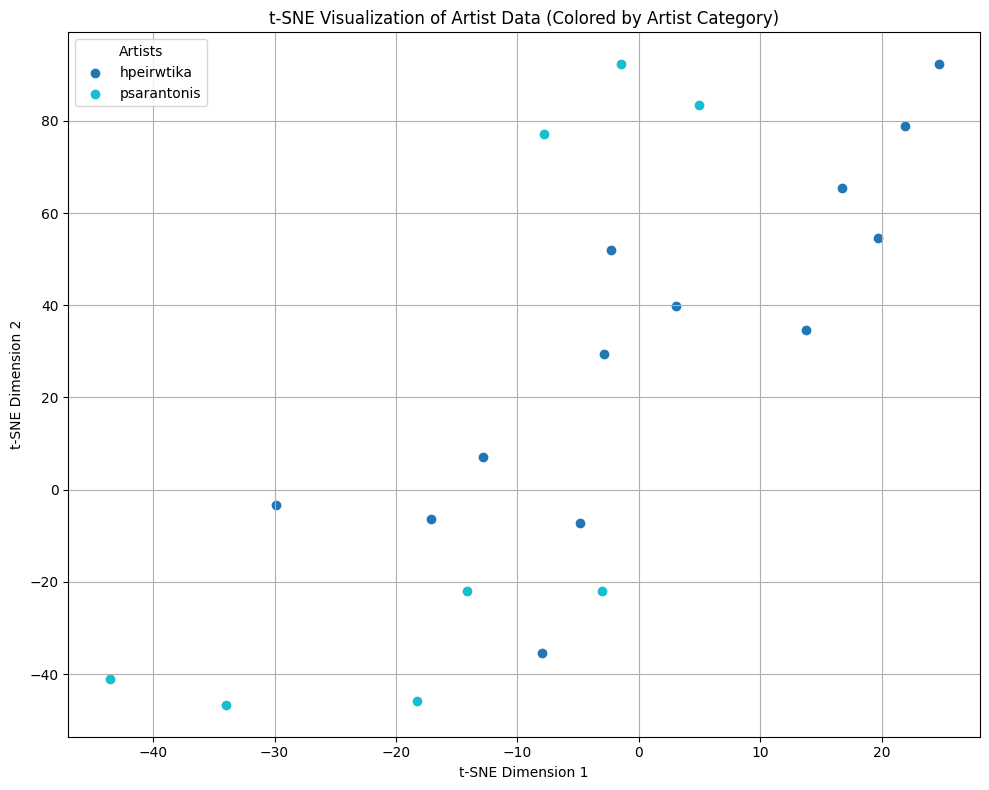

In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV file (assuming header row)
data = pd.read_csv("results_features.csv")

# Separate numerical data and artist category
numerical_data = data.iloc[:, :-1]
artist_category = data.iloc[:, -1]

# Perform t-SNE dimensionality reduction (adjust perplexity as needed)
tsne = TSNE(n_components=2, perplexity=6)  # Adjust perplexity for better fit
X_2d = tsne.fit_transform(numerical_data)

# Create a color map for artist categories with enhanced color scheme
unique_artists = artist_category.unique()
color_map = plt.cm.tab10(np.linspace(0, 1, len(unique_artists)))  # Improved color distribution

# Plot the data with different colors for each artist, avoiding redundancy
plt.figure(figsize=(10, 8))
for i, artist in enumerate(unique_artists):
    plt.scatter(X_2d[artist_category == artist, 0],
                X_2d[artist_category == artist, 1],
                color=color_map[i], label=artist)

# Add labels and title
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of Artist Data (Colored by Artist Category)")

# Enhance legend appearance and layout (optional)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Artists")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()